# Lab3: 23/10/2023
## Robust Linear Regression

### Dafni Tziakouri

### Adriana Álvaro

# 1 Introduction

### **1.** We implement the proposed method with gradient descent and backtracking

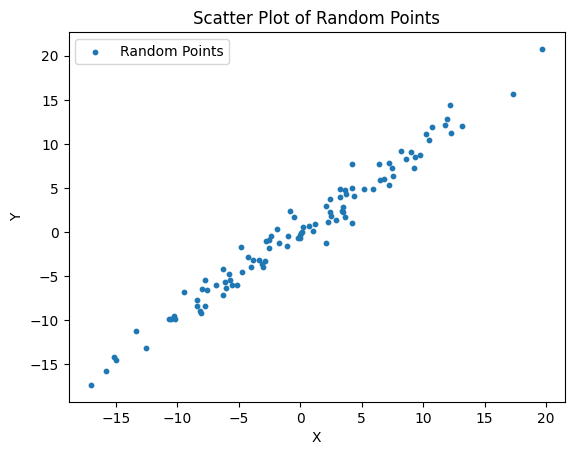

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(5)

def generate_random_point(n):
  # Define the mean vector and covariance matrix
  m = np.array([0., 0.]) # mean vector
  angle = 45 * math.pi / 180
  rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
  lamb = np.array([[n, 0], [0, 1]]) # covariance matrix
  s = np.matmul(rot, np.matmul(lamb, rot.transpose()))

  # Generate 100 random points
  points = np.random.multivariate_normal(m, s, n)

  return points

def plot_points(points):
  # Extract x and y coordinates
  x = points[:, 0]
  y = points[:, 1]

  # Create a scatter plot of the points
  plt.scatter(x, y, marker='o', s=10, label='Random Points')

  # Set plot labels and title
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot of Random Points')

  # Show the legend
  plt.legend()

  # Display the plot
  plt.show()


n = 100 # number of points
points = generate_random_point(n)
plot_points(points)



The model in a linear regresion would be:

\begin{equation*}
\hat{y} = w_0 + w_1x
\end{equation*}


If we use the LMS for measuring the error we get:

\begin{equation*}
Q = \frac{1}{2} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
\end{equation*}

\begin{equation*}
Q = \frac{1}{2} \sum_{i=1}^{m} (w_0 x_i + w_1 - y_i)^2
\end{equation*}


which is the function we want to minimize. We can apply either the Newthon method or the gradient descent to find the minimum of this function.

The gradient descent would iteratively apply:
\begin{equation*}
w_{k+1} = w_k − α_k∇Q(w)
\end{equation*}

\begin{equation*}
∇Q(w) = (\frac{∂Q}{∂w0},\frac{∂Q}{∂w1})
\end{equation*}


Where:
\begin{equation*}
\frac{\partial Q}{\partial w_0} = \sum_{i=1}^{m} (w_0 x_i + w_1 - y_i) x_i
\end{equation*}

\begin{equation*}
\frac{\partial Q}{\partial w_1} = \sum_{i=1}^{m} (w_0 x_i + w_1 - y_i)
\end{equation*}

We will define the function and its gradient:

In [2]:
# Define a quadratic function to be optimized
def func(x, y, w0, w1):
    return 1/2*(((w0*x+w1-y)**2).sum())

# Calculate the gradient of the quadratic function
def grad_func(x, y, w0, w1):
    return np.array([((w0*x+w1-y)*x).sum(), (w0*x+w1-y).sum()])

# Perform gradient descent optimization
def grad_descent(f, x, y, w0 = 0, w1 = 0, max_iters = 100, threshold = (10**-3)):
    coeffs = np.array([w0, w1]) # Initialize the coefficients w0 and w1
    steps = np.matrix(coeffs) # Create a matrix to store the optimization steps
    steps = np.vstack([steps, coeffs]) # Add the initial coefficients to the steps history

    for i in range(1, max_iters): # Perform a maximum of 'max_iters' iterations
        alpha = 1 # Initialize the step size (learning rate) to 1
        coeffs2 = coeffs - alpha * grad_func(x, y, coeffs[0], coeffs[1]) # Update coefficients

        while(f(x, y, coeffs2[0], coeffs2[1]) > f(x, y, coeffs[0], coeffs[1])):
          # While not decreasing, keep updating alpha.
            alpha = alpha / 2
            coeffs2 = coeffs - alpha * grad_func(x, y, coeffs[0], coeffs[1])

        if (f(x, y, coeffs[0], coeffs[1]) - f(x, y, coeffs2[0], coeffs2[1])) < threshold:
            i = i- 1 #If the function value change is less than the threshold, terminate
            break

        coeffs = coeffs2.copy()
        steps = np.vstack([steps, coeffs])
        f_value = f(x, y, coeffs[0], coeffs[1])

    return coeffs, steps, f_value, i+1

In [3]:
coeffs, steps, f, iters = grad_descent(f = func, x = points[:, 0], y = points[:, 1], w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)

Coefficients of the regressor: 0.9644792569601514 0.18229370412293178


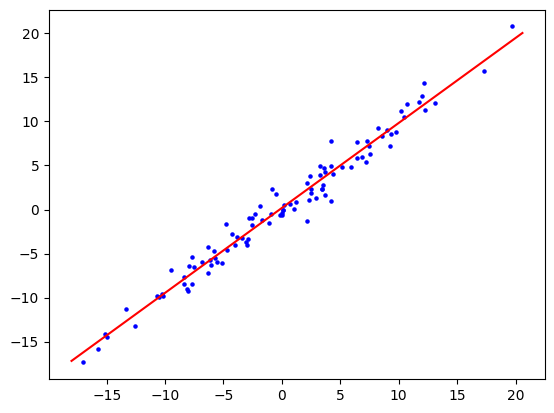

In [4]:
plt.scatter(points[:,0],points[:,1], c= 'blue',s=5)
reg = np.arange(points[:, 0].min() - 1, points[:, 0].max() + 1,0.1)
plt.plot(reg, reg * coeffs[0] + coeffs[1], color = 'red')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

From the above figure it seems that our regressor developed by the method is quite accurate because it feets the data perfectly.

###  **2.** Let us now check the sensitivity of the method to outliers, that is, points that do not follow the model. Using a set of points generate with an angle of 45 degrees, change the value of one point to a value “far away” from the set of points, for instance points[1] = [-40,20]. Draw the line that approximates the set of points and observe that one point may have a large influence in the obtained solution. Change now other points of the original dataset to assess the influence of outliers.

Let's generate again a set of points but this time we will modify one of our points to create an outlier in order to see how our regressor coefficients behave.

In [5]:
points = generate_random_point(n=100)
points[1] = [-40, 20]
x1 = points[:, 0]
x2 = points[:, 1]
coeffs, steps, f, iters = grad_descent(f = func, x = x1, y = x2, w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)

Coefficients of the regressor: 0.6422607426507068 0.6645742240425667


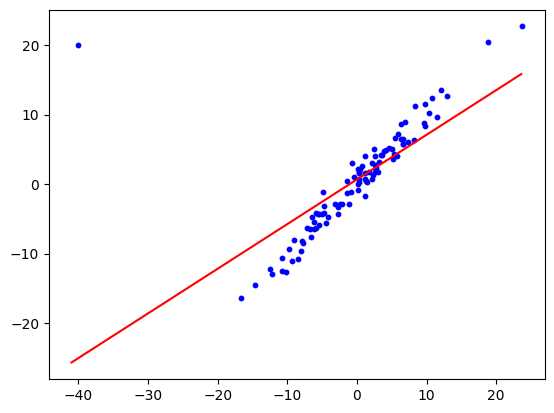

In [6]:
plt.scatter(points[:,0],points[:,1], c= 'blue',s=10)
x_aux = np.arange(x1.min() - 1, x2.max() + 1, 0.1)
plt.plot(x_aux, x_aux*coeffs[0] + coeffs[1], color = 'red')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

The slope of our regressor is larger than in the data without outliers. Therefore, we can say that our model has a high sensibility to data variability. A steeper slope suggests that the model is heavily influenced by outliers or extreme values in the data, which can lead to less robust and less accurate predictions.

We will now create more outliers:

Coefficients of the regressor: 0.5867349511640831 1.4224036892534293
Coefficients of the regressor: 0.5867349511640831 1.4224036892534293


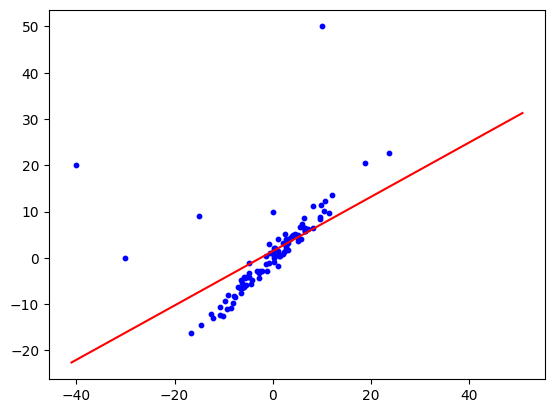

In [7]:
points[8] = [0, 10]
points[11] = [10, 50]
points[23] = [-15, 9]
points[72] = [-30, 0]

x1 = points[:, 0]
x2 = points[:, 1]

coeffs, steps, f, iters = grad_descent(f = func, x = x1, y = x2, w0 = 0, w1 = 0, max_iters = 1000, threshold = 10**-6)
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

plt.scatter(points[:,0],points[:,1], c= 'blue',s=10)
x_aux = np.arange(x1.min() - 1, x2.max() + 1, 0.1)
plt.plot(x_aux, x_aux*coeffs[0] + coeffs[1], color = 'red')
print("Coefficients of the regressor:", coeffs[0], coeffs[1])

We can see that when adding more outliers, our regressor behaves in even more strange way, with a slope that does not match our data.
Our slope decreases, but the regressor its obviously wrong. Therefore, we can admit that our model is very sensitive to variability and outliers.

# 2 Robust functions

 Without entering into exhaustive details, a reasonable possibility is to minimise \begin{equation*}
\frac{1}{2}\sum_{i=1}^{m} \rho(e_i)
\end{equation*}

where $ρ(u)$ is a robust error function. For the least squared method $\rho(u) = \frac{1}{2}u^2$, but one may take other functions such as the Cauchy function, which is defined to be
\begin{equation*}
\rho(u) = \frac{c^2}{2} \log\left(1 + \left(\frac{u}{c}\right)^2\right),  c ∈ R
\end{equation*}

### **1.** Plot the least squares function $\rho(u) = \frac{1}{2}u^2$, and compare it with the Cauchy function, Eq.(2), in order to see the “importance” given to each prediction error u, you may, for instance, plot the function ρ(u) for |u| ≤ 10.

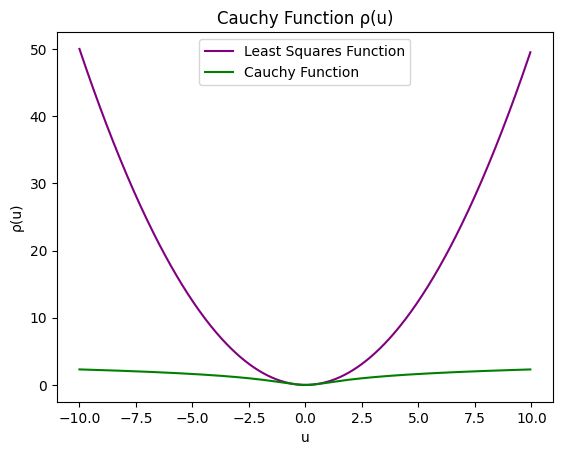

In [9]:
# Let's plot both functions

u_funct = np.arange(-10, 10, 0.05)
c_cauchy = 1

plt.plot(u_funct, 1/2*(u_funct**2), color = 'purple', label = "Least Squares Function")
plt.plot(u_funct, (c_cauchy**2/2) * np.log(1 + (u_funct/c_cauchy)**2), color = 'green', label = "Cauchy Function")
plt.title('Cauchy Function ρ(u)')
plt.xlabel('u')
plt.ylabel('ρ(u)')
plt.legend(loc="best")

We can see that the Cauchy's function curve is more smooth while the LS function curve is more sensitive to the variability.

### **2.** Implement the algorithm that allows to compute the parameters w0 and w1 using the Cauchy function. For that issue you can use the backtracking gradient descent method (there is no need to use the Newton method).

We define the cauchy function and its gradient:

In [10]:
def cauchy(x, y, w0 = 0, w1 = 0, c = 1):
    return ((c**2)/2*np.log(1 + (((w0*x)+w1-y)/c)**2)).sum()

def grad_cauchy(x, y, w0, w1, c):
    return np.array([((c**2)/2*1/(1+(((w0*x)+w1-y)/c)**2)*2*(w0*x+w1-y)/(c**2)*x).sum(), (c**2/2*1/(1+((w0*x+w1-y)/c)**2)*2*(w0*x+w1-y)/(c**2)).sum()])

def grad_descent_cauchy(f, x, y, w0 = 0, w1 = 0, max_iters = 100, threshold = 10**-3, c = 1):
    coeffs = np.array([w0, w1])
    steps = np.matrix(coeffs)
    steps = np.vstack([steps, coeffs])
    for i in range(1, max_iters):
        alpha = 1
        coeffs2 = coeffs - alpha * grad_cauchy(x, y, coeffs[0], coeffs[1], c = c)
        while(f(x, y, coeffs2[0], coeffs2[1], c = c) > f(x, y, coeffs[0], coeffs[1], c = c)):
            alpha = alpha / 2
            coeffs2 = coeffs - alpha * grad_cauchy(x, y, coeffs[0], coeffs[1], c = c)
        if (f(x, y, coeffs[0], coeffs[1], c = c) - f(x, y, coeffs2[0], coeffs2[1], c = c)) < threshold:
            i -= 1
            break
        coeffs = coeffs2.copy()
        steps = np.vstack([steps, coeffs])
    f_value = f(x, y, coeffs[0], coeffs[1], c = c)

    return coeffs, steps, f_value, i+1

### **3.** Compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

In [11]:
points1 = generate_random_point(100) # Without Outliers
x11 = points1[:, 0]
x22 = points1[:, 1]
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, 10**-3)
coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 0, 0, 100, (10**-3))

<ipython-input-12-144d0c1d4838>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x11, x22, 'bo', markersize=5, c='orange')


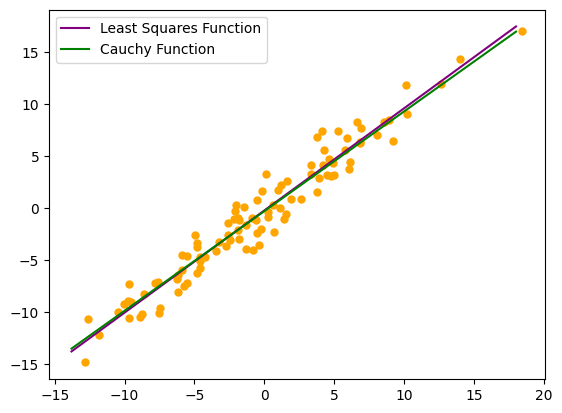

In [12]:
plt.plot(x11, x22, 'bo', markersize=5, c='orange')
plt.plot()
reg2 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
plt.plot(reg2, reg2*coeffs[0] + coeffs[1], color = 'purple', label = "Least Squares Function")
plt.plot(reg2, reg2*coeffs2[0] + coeffs2[1], color = 'green', label = "Cauchy Function")
plt.legend(loc="best")

We can not see any differneces between the two method because both of them cut the data equally.

### **4.** Compare now the results with only one outlier. You may proceed as previously proposed. The Cauchy function should be more robust than the quadratic function.

<ipython-input-13-78cf1db9614c>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x11, x22, 'bo', markersize=5, c='orange')


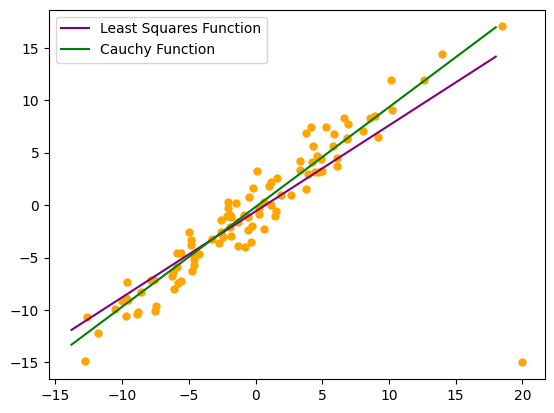

In [13]:
#One outlier, generate the points
points1[1] = [20, -15]
x11 = points1[:, 0]
x22 = points1[:, 1]
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, 10**-3)
coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 0, 0, 100, 10**-3, c = 1)

#Lets plot the functions
plt.plot(x11, x22, 'bo', markersize=5, c='orange')
plt.plot()
reg2 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
plt.plot(reg2, reg2 * coeffs[0] + coeffs[1], color = 'purple', label = "Least Squares Function")
plt.plot(reg2, reg2 * coeffs2[0] + coeffs2[1], color = 'green', label = "Cauchy Function")
plt.legend(loc="best")

We can see that the Cauchy's function seems to be more rebust than the Least Squares function when applying an outlier. Therefore, is more preferable to use the Cauchy's function.

### **5.** Test the influence of the parameter $c$ in the parameters obtained. You may, for instance, check the results obtained with $c = 1$, $c = 100$, $c = \frac{1}{100}$ and $c = \frac{1}{1000}$. Can you reason why of these results? To this end, you are recommended to plot the histogram of the error function $|u|$ and to compare with the shape corresponding $ρ(u)$ functions. Consider performing a “zoom” of the Cauchy function to see the interval at which the function behaves as a quadratic function. Which values are considered as “inliers” / “outliers”?


We will plot histograms for the error function $|u|$ and compare them with the Cauchy function $ρ(u)$ for different values of the parameter c.


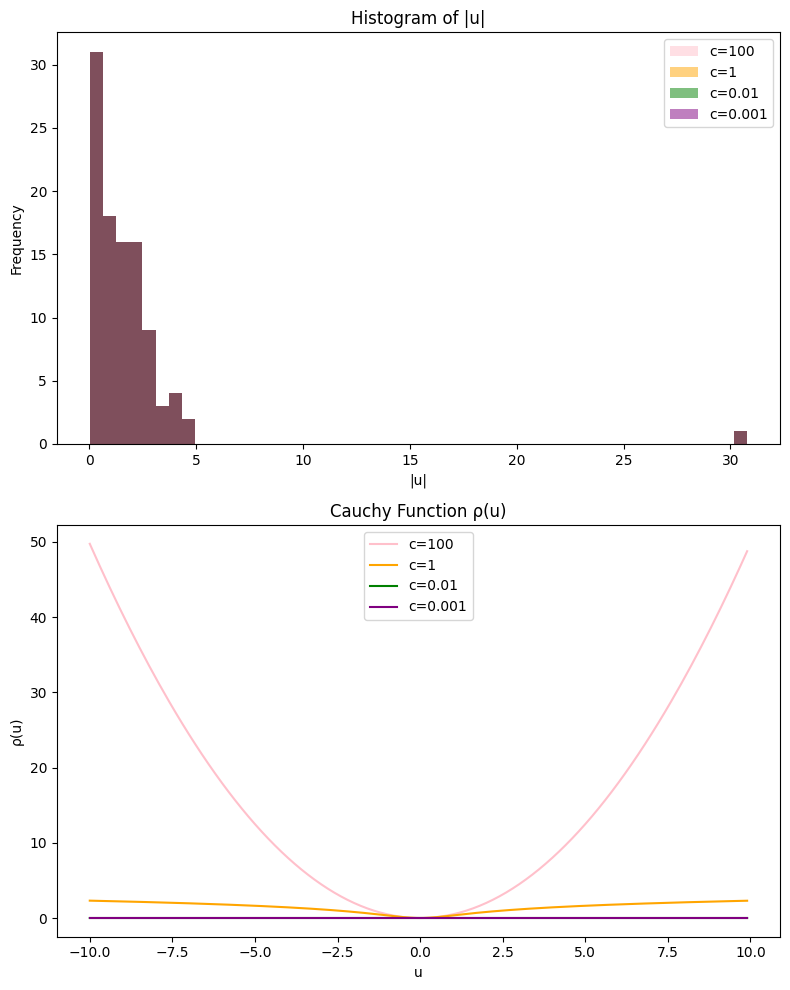

In [14]:
cauchy_c = [100, 1, 1/100, 1/1000]
colors = ['pink', 'orange', 'green', 'purple']

# Calculate the error function |u| for each c
error_functions = []
for c in cauchy_c:
    error = np.abs(x22 - coeffs[0] * x11 - coeffs[1])
    error_functions.append(error)

# Generate a range of values for the Cauchy function
u_values = np.arange(-10, 10, 0.1)
cauchy_functions = [c**2 / 2 * np.log(1 + (u_values / c)**2) for c in cauchy_c]

# Create a figure with two rows and one column for the subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

for i in range(len(cauchy_c)):
    # Plot histogram of |u| in the first row
    axs[0].hist(error_functions[i], bins=50, color=colors[i], alpha=0.5, label=f'c={cauchy_c[i]}')
    axs[0].set_title('Histogram of |u|')
    axs[0].set_xlabel('|u|')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot Cauchy function ρ(u) in the second row
    axs[1].plot(u_values, cauchy_functions[i], color=colors[i], label=f'c={cauchy_c[i]}')
    axs[1].set_title('Cauchy Function ρ(u)')
    axs[1].set_xlabel('u')
    axs[1].set_ylabel('ρ(u)')
    axs[1].legend()

plt.tight_layout()
plt.show()


We notice that, high values of c have bigger error penalizations. While we lower the Cauchy's c value, the penalization decreases. Also, we can see that for the values of c=0.01, 0.001 the errors are very similar ( we can not see difference).

<ipython-input-48-89cb0419d8ea>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x11, x22, 'bo',markersize=3, c='blue')


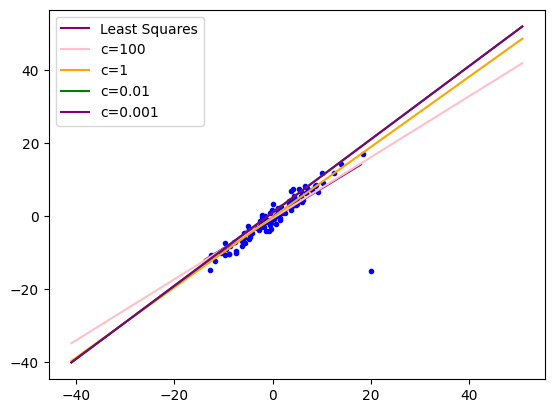

In [48]:
coeffs, steps, f, iters = grad_descent(func, x11, x22, 0, 0, 100, (10**-3))
x11 = points1[:, 0]
x22 = points1[:, 1]
plt.plot(x11, x22, 'bo',markersize=3, c='blue')
plt.plot()
reg4 = np.arange(x11.min() - 1, x22.max() + 1, 0.1)
plt.plot(reg4, reg4 * coeffs[0] + coeffs[1], color = 'purple', label = "Least Squares")
for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x11, x22, 1, 1, 1000, 10**-3, c = cauchy_c[i])
    plt.plot(x_aux, x_aux * coeffs2[0] + coeffs2[1], color = colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")

When $c=100$, the Cauchy's function is more affected by the outliers. For $c= 1, 1/100$ and $c=1/1000$ the regressor function seems to not be affected by the outliers. So, we can say that the Cauchy's function becomes more sensitive to variability as the c value increases. Therefore, if we use any of these c values(c = 1, 1/100, 1/1000 ) when using the Cauchy's function the results will be similar.

### **6.** The Cauchy function is not “perfect”, and it is not robust for any number of outliers. Using $c = 1$ and $c = 1/100$ you may, as before, gradually introduce more number of outliers into the dataset. You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers. Can you comment on the experiments you have performed?

In [49]:
# Again, we create the some outliers
points[8] = [0, 10]
points[9] = [10, 50]
points[10] = [-15, 9]
points[11] = [-30, 0]

<ipython-input-50-86e0f97e1e7e>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x12, x22, 'bo', markersize=3, c='blue')


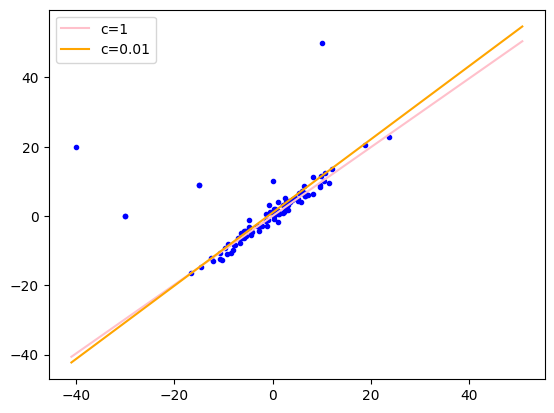

In [50]:
cauchy_c = [1, 1/100]  # Values for c
x12 = points[:, 0]
x22 = points[:, 1]

# Plot the dataset with outliers
plt.plot(x12, x22, 'bo', markersize=3, c='blue')

for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x12, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    reg4 = np.arange(x12.min() - 1, x22.max() + 1, 0.1)
    plt.plot(reg4, reg4 * coeffs2[0] + coeffs2[1], color=colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")

While adding the 4 outliers, bothe Cauchy functions seem to still be rebust. Cauchy's function with c = 1 seems to be a litle bit better than c= 0.01, but they are very similar.

Let's add 4 more outliers:

In [51]:
# Again, we create the some outliers
points[12] = [0, 80]
points[13] = [-5, 33]
points[14] = [-30, 0]
points[15] = [-40, 95]

<ipython-input-52-86e0f97e1e7e>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x12, x22, 'bo', markersize=3, c='blue')


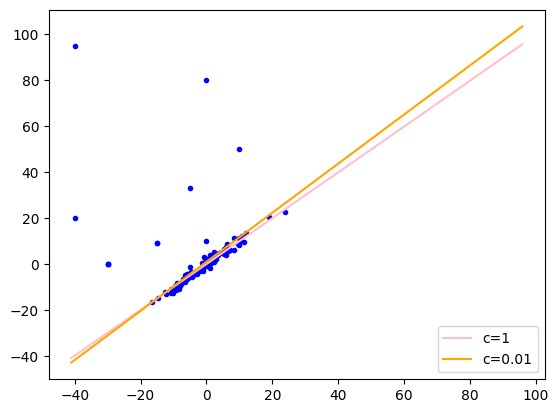

In [52]:
cauchy_c = [1, 1/100]  # Values for c
x12 = points[:, 0]
x22 = points[:, 1]

# Plot the dataset with outliers
plt.plot(x12, x22, 'bo', markersize=3, c='blue')

for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x12, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    reg4 = np.arange(x12.min() - 1, x22.max() + 1, 0.1)
    plt.plot(reg4, reg4 * coeffs2[0] + coeffs2[1], color=colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")

Again, both functions, with c = 1 and c = 0.01 seem to be very robust to th outliers, ebven when we added even more 4 outliers.

Let's add even more outliers with more extreme values and see what is going to happen:

In [53]:
# Introduce more extreme outliers into the dataset
points[17] = [-14, 132]
points[18] = [-12, 89]
points[19] = [-5, 98]
points[20] = [-30, 89]
points[21] = [-40, 70]
points[22] = [-30, 132]
points[23] = [-20, 89]
points[24] = [-17, 198]
points[25] = [-35, 342]
points[26] = [-40, 500]
points[27] = [147, -65]
points[28] = [162, -77]
points[29] = [144, -59]
points[30] = [203, -28]
points[31] = [152, -10]
points[32] = [132, -65]
points[33] = [125, -59]
points[34] = [246, -28]
points[35] = [325, -10]
points[36] = [173, -65]
points[37] = [146, -77]
points[38] = [112, -59]
points[39] = [224, -28]
points[40] = [324, -10]

<ipython-input-54-c41b7b789ac2>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x12, x22, 'bo', markersize=3, c='blue')


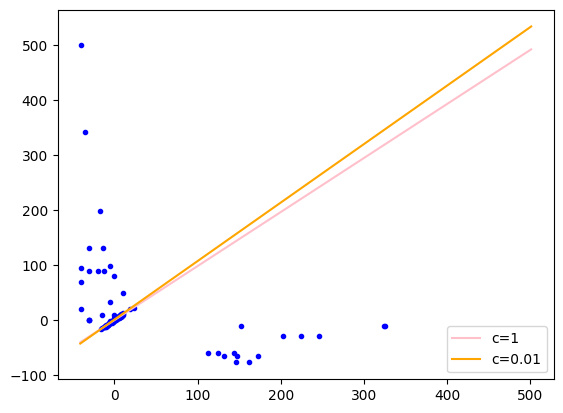

In [54]:
# Now, perform plotting and regression with the updated dataset
cauchy_c = [1, 1/100]  # Values for c
x12 = points[:, 0]
x22 = points[:, 1]

# Plot the dataset with outliers
plt.plot(x12, x22, 'bo', markersize=3, c='blue')

for i in range(len(cauchy_c)):
    coeffs2, steps2, f2, iters2 = grad_descent_cauchy(cauchy, x12, x22, 1, 1, 1000, 10**-6, c=cauchy_c[i])
    reg4 = np.arange(x12.min() - 1, x22.max() + 1, 0.1)
    plt.plot(reg4, reg4 * coeffs2[0] + coeffs2[1], color=colors[i], label=f'c={cauchy_c[i]}')

plt.legend(loc="best")


We notice that as we keep increasing the amount of outliers in the dataset the cauchy function with c = 1 is getting "confused" and therefore, not robust anymore. On the other hand, Cauchy's function with c = 0.01, keeps being very robust. So, Cauchy's function is very good when dealing with outliers.